# Loading and processing dataset

Using DocLayNet form HuggingFace to build a multimodal dataset with:
- PIL image
- text
- label

In [1]:
from datasets import load_dataset, DatasetDict

In [2]:
dataset_base = load_dataset("pierreguillou/DocLayNet-base")
dataset_base

DatasetDict({
    train: Dataset({
        features: ['id', 'texts', 'bboxes_block', 'bboxes_line', 'categories', 'image', 'page_hash', 'original_filename', 'page_no', 'num_pages', 'original_width', 'original_height', 'coco_width', 'coco_height', 'collection', 'doc_category'],
        num_rows: 6910
    })
    validation: Dataset({
        features: ['id', 'texts', 'bboxes_block', 'bboxes_line', 'categories', 'image', 'page_hash', 'original_filename', 'page_no', 'num_pages', 'original_width', 'original_height', 'coco_width', 'coco_height', 'collection', 'doc_category'],
        num_rows: 648
    })
    test: Dataset({
        features: ['id', 'texts', 'bboxes_block', 'bboxes_line', 'categories', 'image', 'page_hash', 'original_filename', 'page_no', 'num_pages', 'original_width', 'original_height', 'coco_width', 'coco_height', 'collection', 'doc_category'],
        num_rows: 499
    })
})

In [3]:
dataset_base = dataset_base.remove_columns(['original_filename', 'page_no', 'num_pages', 'original_width', 'original_height',
                                'coco_width', 'coco_height', 'collection', 'page_hash', 'bboxes_block', 'bboxes_line', 'categories',
                                'id'])
dataset_base

DatasetDict({
    train: Dataset({
        features: ['texts', 'image', 'doc_category'],
        num_rows: 6910
    })
    validation: Dataset({
        features: ['texts', 'image', 'doc_category'],
        num_rows: 648
    })
    test: Dataset({
        features: ['texts', 'image', 'doc_category'],
        num_rows: 499
    })
})

In [4]:
def transform_example(example):
    concatenated_text = ' '.join([''.join(text_list) for text_list in example['texts']])
    example['text'] = concatenated_text
    return example

def process_dataset(dataset):
    dataset = dataset.map(lambda x: {
        'image': x['image'],
        'text': x['texts'],
        'label': x['doc_category']
    })

    dataset = dataset.map(transform_example)
    return dataset.remove_columns(['texts', 'doc_category'])


In [5]:
dataset = DatasetDict({
    split: process_dataset(dataset_base[split]) for split in dataset_base
})
dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'text', 'label'],
        num_rows: 6910
    })
    validation: Dataset({
        features: ['image', 'text', 'label'],
        num_rows: 648
    })
    test: Dataset({
        features: ['image', 'text', 'label'],
        num_rows: 499
    })
})

In [6]:
dataset['train'][1]

{'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1025x1025>,
 'text': "134  Pascal User Manual  5. If Ch is a variable of type Cd:  or subrange of Char, then  Read (F, Ch)  assigns the chal Icier at the current position of  file F  or the value of Fi to  I.  followed by a Get (F), the  choice being implementation- dependent.  6.  If  a parameter v  is of tYll'  I  nteger  or a subrange of  Integer  then  Read  accel'ts  a  sequence  of characters  forming a signed integer witl  possible leading blanks. The  integer value denoted by this  I.~quence  is then assigned to v.  7. If a parameter v is of type:  1  l, Read accepts a sequence  of characters forming a signee number with possible leading  blanks.  The real  value deno  l~d  by  this  sequence is  then  assigned to v.  In scanning F  (skipping blank  ) to read numbers, Read may also  skip  end-of-line markers.  F  l~  left  positioned to  the  non-digit  character following the last digit  l  \\)flstituting a number.

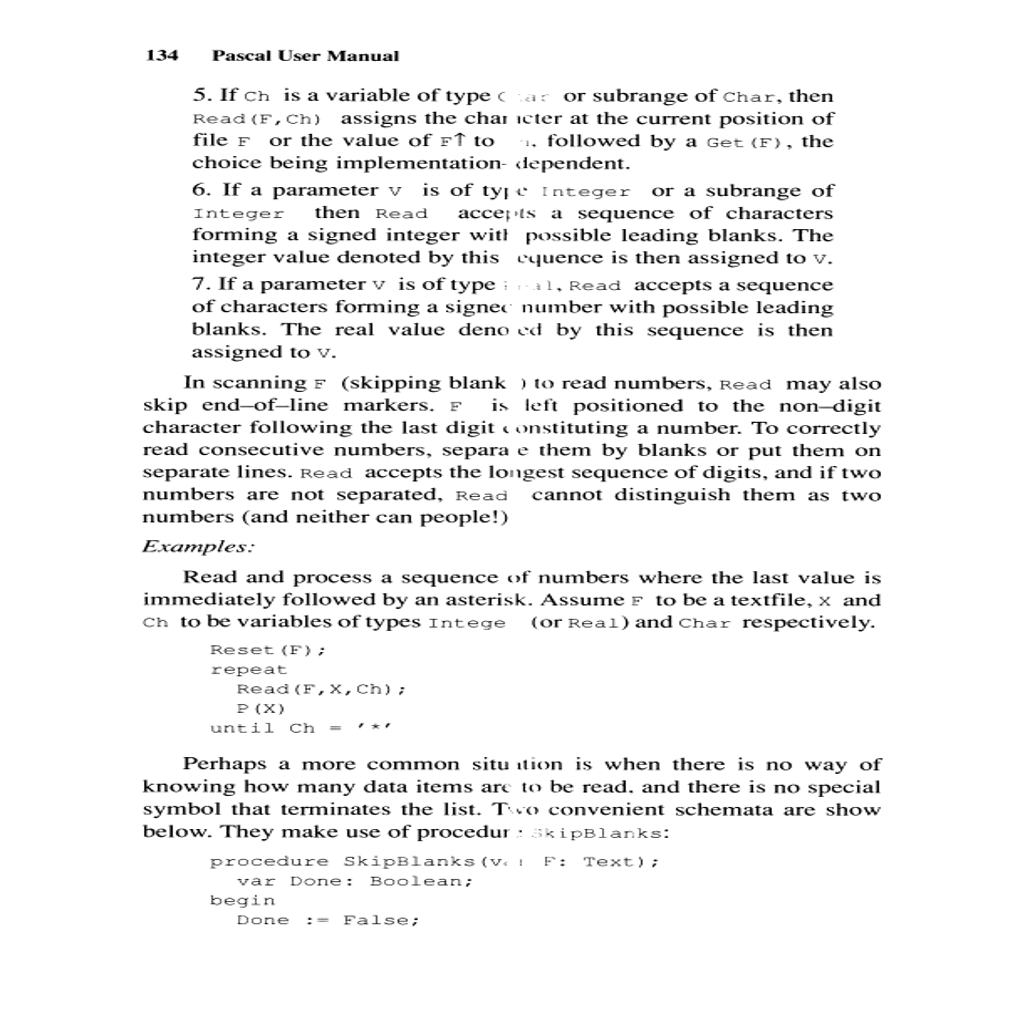

In [7]:
dataset['train'][1]['image']

In [8]:
class_names = ['laws_and_regulations', 'scientific_articles', 'financial_reports', 'manuals', 'government_tenders', 'patents']

In [9]:
dataset.save_to_disk("../data/doclaynet_dataset")

Saving the dataset (0/6 shards):   0%|          | 0/6910 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/648 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/499 [00:00<?, ? examples/s]